In [466]:

import pandas as pd
import numpy as np
import seaborn as sns

In [467]:
prefix  = "../data/"

df_demographic = pd.read_csv(prefix+"DemographicData_ZCTAs.csv")
df_economic = pd.read_csv(prefix+"EconomicData_ZCTAs.csv")
df_geocode = pd.read_csv(prefix+"df_geocode.csv")
df_tests = pd.read_csv(prefix+"test_data.csv")
df_transactional = pd.read_csv(prefix+"transactional_data.csv",sep=";",decimal=",")

# Sanity check

## Sanity check df_demographic

In [468]:
df_demographic.head(5)

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


Corrigindo o nome das colunas

In [469]:
df_demographic.columns = [x.replace(" ","").replace("(","").replace(")","").replace("_","") for x in df_demographic.columns] # Renomeando as colunas 

Descartando a coluna Unnamed:0, pois já o dataframe já contém index

In [470]:
df_demographic = df_demographic.iloc[:,1:]

Verificando as colunas com valores nulos

In [471]:
df_demographic.isnull().sum()

Id                              0
GeographicAreaName              0
TotalPopulation                 0
SexRatiomalesper100females    500
PopulationUnder5Years           0
Population5to9Years             0
Population10to14Years           0
Population15to19Years           0
Population20to24Years           0
Population25to34Years           0
Population35to44Years           0
Population45to54Years           0
Population55to59Years           0
Population60to64Years           0
Population65to74Years           0
Population75to84Years           0
Population85YearsAndOver        0
MedianAgeInYears              569
dtype: int64

In [472]:
print(f"Como vemos, cerca de {((100*df_demographic[df_demographic.isna().any(axis=1)].shape[0])/df_demographic.shape[0]):.3f}\
% das {df_demographic.shape[0]} linhas contém dados nulos")

Como vemos, cerca de 1.863% das 33120 linhas contém dados nulos


Como não é possível obter os dados faltantes, as linhas que contém os dados faltantes serão excluidas do dataframe

In [473]:
df_demographic = df_demographic.dropna(how='any') # Dropando os valores nulos

Como é possível verificar, não constam mais valores nulos em nenhuma coluna do dataframe

In [474]:
df_demographic.isnull().sum()

Id                            0
GeographicAreaName            0
TotalPopulation               0
SexRatiomalesper100females    0
PopulationUnder5Years         0
Population5to9Years           0
Population10to14Years         0
Population15to19Years         0
Population20to24Years         0
Population25to34Years         0
Population35to44Years         0
Population45to54Years         0
Population55to59Years         0
Population60to64Years         0
Population65to74Years         0
Population75to84Years         0
Population85YearsAndOver      0
MedianAgeInYears              0
dtype: int64

Corrigindo o index após a remoção dos valores nulos

In [475]:
df_demographic = df_demographic.reset_index(drop=True)

Verificando o formato dos dados das colunas 

In [476]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32503 entries, 0 to 32502
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          32503 non-null  object 
 1   GeographicAreaName          32503 non-null  object 
 2   TotalPopulation             32503 non-null  int64  
 3   SexRatiomalesper100females  32503 non-null  float64
 4   PopulationUnder5Years       32503 non-null  int64  
 5   Population5to9Years         32503 non-null  int64  
 6   Population10to14Years       32503 non-null  int64  
 7   Population15to19Years       32503 non-null  int64  
 8   Population20to24Years       32503 non-null  int64  
 9   Population25to34Years       32503 non-null  int64  
 10  Population35to44Years       32503 non-null  int64  
 11  Population45to54Years       32503 non-null  int64  
 12  Population55to59Years       32503 non-null  int64  
 13  Population60to64Years       325

É possível verificar que as colunas "Id" e "GeographicAreaName" são do tipo "object", e necessitam ser convertidas para tipos específicos

In [477]:
df_demographic["Id"] = df_demographic["Id"].astype(pd.StringDtype())
df_demographic["GeographicAreaName"] = df_demographic["GeographicAreaName"].astype(pd.StringDtype())

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [478]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32503 entries, 0 to 32502
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          32503 non-null  string 
 1   GeographicAreaName          32503 non-null  string 
 2   TotalPopulation             32503 non-null  int64  
 3   SexRatiomalesper100females  32503 non-null  float64
 4   PopulationUnder5Years       32503 non-null  int64  
 5   Population5to9Years         32503 non-null  int64  
 6   Population10to14Years       32503 non-null  int64  
 7   Population15to19Years       32503 non-null  int64  
 8   Population20to24Years       32503 non-null  int64  
 9   Population25to34Years       32503 non-null  int64  
 10  Population35to44Years       32503 non-null  int64  
 11  Population45to54Years       32503 non-null  int64  
 12  Population55to59Years       32503 non-null  int64  
 13  Population60to64Years       325

Verificando a existência de registros duplicados

In [479]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_demographic.duplicated().sum()

0

In [480]:
# Aqui verificamos se existe algum Id duplicado
df_demographic["Id"].duplicated().sum()

0

In [481]:
# Aqui verificamos se existem registros duplicados,
#excluindo o Id e levando em consideração apenas as variáveis numéricas
df_demographic[df_demographic.columns[1:]].duplicated().sum()

0

Tratamento de outliers presentes no dataframe

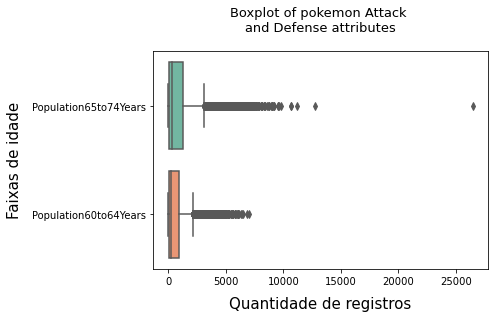

In [482]:
ax = sns.boxplot(data = df_demographic[["Population65to74Years", "Population60to64Years"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Quantidade de registros", fontsize = 15, labelpad = 10)
ax.set_ylabel("Faixas de idade", fontsize = 15, labelpad = 10)
ax.set_title("Boxplot of pokemon Attack \nand Defense attributes", fontsize = 13,
            pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 10)

## Sanity check df_economic

In [483]:
df_economic.head(5)

,Unnamed: 0,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


Corrigindo o nome das colunas

In [484]:
df_economic.columns = [x.replace(" ","").replace("(","_").replace(")","") for x in df_economic.columns] # Renomeando as colunas 

Descartando a coluna Unnamed:0, pois já o dataframe já contém index

In [485]:
df_economic = df_economic.iloc[:,1:]

Verificando as colunas com valores nulos

In [486]:
df_economic.isnull().sum()

id                                    0
GeographicAreaName                    0
TotalHouseholds_LessThan$10.000       0
TotalHouseholds_$10.000to$14.999      0
TotalHouseholds_$15.000to$24.999      0
TotalHouseholds_$25.000to$34.999      0
TotalHouseholds_$35.000to$49.999      0
TotalHouseholds_$50.000to$74.999      0
TotalHouseholds_$75.000to$99.999      0
TotalHouseholds_$100.000to$149.999    0
TotalHouseholds_$150.000to$199.999    0
TotalHouseholds_$200.000OrMore        0
dtype: int64

Como verificamos, nesse dataframe não está presente nenhum nulo. Podemos passar para a verificação dos formatos dos dados nas colunas

In [487]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629280 entries, 0 to 629279
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   id                                  629280 non-null  object
 1   GeographicAreaName                  629280 non-null  object
 2   TotalHouseholds_LessThan$10.000     629280 non-null  int64 
 3   TotalHouseholds_$10.000to$14.999    629280 non-null  int64 
 4   TotalHouseholds_$15.000to$24.999    629280 non-null  int64 
 5   TotalHouseholds_$25.000to$34.999    629280 non-null  int64 
 6   TotalHouseholds_$35.000to$49.999    629280 non-null  int64 
 7   TotalHouseholds_$50.000to$74.999    629280 non-null  int64 
 8   TotalHouseholds_$75.000to$99.999    629280 non-null  int64 
 9   TotalHouseholds_$100.000to$149.999  629280 non-null  int64 
 10  TotalHouseholds_$150.000to$199.999  629280 non-null  int64 
 11  TotalHouseholds_$200.000OrMore      629

É possível verificar que as colunas "Id" e "GeographicAreaName" são do tipo "object", e necessitam ser convertidas para tipos específicos

In [488]:
df_economic["id"] = df_economic["id"].astype(pd.StringDtype())
df_economic["GeographicAreaName"] = df_economic["GeographicAreaName"].astype(pd.StringDtype())

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [489]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629280 entries, 0 to 629279
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   id                                  629280 non-null  string
 1   GeographicAreaName                  629280 non-null  string
 2   TotalHouseholds_LessThan$10.000     629280 non-null  int64 
 3   TotalHouseholds_$10.000to$14.999    629280 non-null  int64 
 4   TotalHouseholds_$15.000to$24.999    629280 non-null  int64 
 5   TotalHouseholds_$25.000to$34.999    629280 non-null  int64 
 6   TotalHouseholds_$35.000to$49.999    629280 non-null  int64 
 7   TotalHouseholds_$50.000to$74.999    629280 non-null  int64 
 8   TotalHouseholds_$75.000to$99.999    629280 non-null  int64 
 9   TotalHouseholds_$100.000to$149.999  629280 non-null  int64 
 10  TotalHouseholds_$150.000to$199.999  629280 non-null  int64 
 11  TotalHouseholds_$200.000OrMore      629

## Sanity check df_geocode

In [490]:
df_geocode.head(5)

,Unnamed: 0,Lab Id,Address,Location,Zipcode
0,0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


Corrigindo o nome das colunas

In [491]:
df_geocode.columns = [x.replace(" ","") for x in df_geocode.columns] # Renomeando as colunas 

Descartando a coluna Unnamed:0, pois já o dataframe já contém index

In [492]:
df_geocode = df_geocode.iloc[:,1:]

Verificando as colunas com valores nulos

In [493]:
df_geocode.isnull().sum()

LabId       0
Address     0
Location    0
Zipcode     1
dtype: int64

In [494]:
df_geocode[df_geocode.isna().any(axis=1)].shape[0]

1

In [495]:
df_geocode[df_geocode.isna().any(axis=1)]

,LabId,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


Como podemos ver é apenas uma linha com valores faltantes e além de o zip code estar faltando, o endereço por extenso e as coordenadas também estão, o que impossibilita a busca das informações através de uma API ou dataframe auxiliar com endereços. Logo é necessário remover a linha

In [496]:
df_geocode = df_geocode.dropna(how='any') # Dropando os valores nulos

Como é possível verificar, não constam mais valores nulos em nenhuma coluna do dataframe

In [497]:
df_geocode.isnull().sum()

LabId       0
Address     0
Location    0
Zipcode     0
dtype: int64

Corrigindo o index após a remoção dos valores nulos

In [498]:
df_geocode = df_geocode.reset_index(drop=True)

Verificando o formato dos dados das colunas 

In [499]:
df_geocode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LabId     118 non-null    object 
 1   Address   118 non-null    object 
 2   Location  118 non-null    object 
 3   Zipcode   118 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.8+ KB


A coluna location deve se tornar duas colunas, latitude e longitude, visto que ela armazena dois valores, que deveriam estar no formato float, pois os dois são números reais

In [500]:
def get_latitude(location):
    latitude = location.split(',')[0]
    return float(latitude)

def get_longitude(location):
    longitude = location.split(',')[1]
    return float(longitude)

df_geocode["Latitude"] = df_geocode["Location"].apply(get_latitude)
df_geocode["Longitude"] = df_geocode["Location"].apply(get_longitude)

In [501]:
df_geocode["LabId"] = df_geocode["LabId"].astype(pd.StringDtype())
df_geocode["Address"] = df_geocode["Address"].astype(pd.StringDtype())
df_geocode["Zipcode"] = df_geocode["Zipcode"].astype("Int64")

In [502]:
# Removendo a coluna location
df_geocode = df_geocode[["LabId","Address","Zipcode","Latitude","Longitude"]]

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [503]:
df_geocode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LabId      118 non-null    string 
 1   Address    118 non-null    string 
 2   Zipcode    118 non-null    Int64  
 3   Latitude   118 non-null    float64
 4   Longitude  118 non-null    float64
dtypes: Int64(1), float64(2), string(2)
memory usage: 4.8 KB


Verificando a existência de registros duplicados

In [504]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_geocode.duplicated().sum()

0

In [524]:
# Aqui verificamos se existe algum Id duplicado
df_geocode["LabId"].duplicated().sum()

0

In [532]:
# Aqui verificamos se tem algum endereço que não seja único, e depois verificamos o zipcode 
#juntamente com latitude e longitude, visto que podem existir mais de um laboratório em 
#um zip code
df_geocode["Address"].duplicated().sum(),\
df_geocode[["Zipcode","Latitude","Longitude"]].duplicated().sum()

(0, 0)

## Sanity check df_tests

In [506]:
df_tests.head(5)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


Corrigindo o nome das colunas

In [507]:
df_tests.columns = [x.replace(" ","") for x in df_tests.columns] # Renomeando as colunas 

Verificando as colunas com valores nulos

In [508]:
df_tests.isnull().sum()

CodItem        0
DescItem       0
Category       0
Family         0
Speciality     0
TestingCost    0
dtype: int64

Como não foi verificado nenhum valor nulo, não é necessário tratamento e podemos passar para a verificação do formato das colunas

In [509]:
df_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodItem      2002 non-null   int64  
 1   DescItem     2002 non-null   object 
 2   Category     2002 non-null   object 
 3   Family       2002 non-null   object 
 4   Speciality   2002 non-null   object 
 5   TestingCost  2002 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.0+ KB


Aqui é notável que a maioria das colunas estão no formato object e é necessário um casting 

In [510]:
df_tests["CodItem"] = df_tests["CodItem"].astype("Int64")
df_tests["DescItem"] = df_tests["DescItem"].astype(pd.StringDtype())
df_tests["Category"] = df_tests["Category"].astype(pd.StringDtype())
df_tests["Family"] = df_tests["Family"].astype(pd.StringDtype())
df_tests["Speciality"] = df_tests["Speciality"].astype(pd.StringDtype())

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [511]:
df_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodItem      2002 non-null   Int64  
 1   DescItem     2002 non-null   string 
 2   Category     2002 non-null   string 
 3   Family       2002 non-null   string 
 4   Speciality   2002 non-null   string 
 5   TestingCost  2002 non-null   float64
dtypes: Int64(1), float64(1), string(4)
memory usage: 95.9 KB


## Sanity check df_transactional

In [512]:
df_transactional.head(5)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0


Corrigindo o nome das colunas

In [513]:
df_transactional.columns = [x.replace(" ","") for x in df_transactional.columns] # Renomeando as colunas 

Verificando as colunas com valores nulos

In [514]:
df_transactional.isnull().sum()

PatientId        0
Gender           0
Dateofbirth      1
Dateofservice    0
ServiceId        0
LabId            0
CodItem          0
TestingCost      0
dtype: int64

In [515]:
print(f"Como vemos, cerca de {((100*df_transactional[df_transactional.isna().any(axis=1)].shape[0])/df_demographic.shape[0]):.3f}\
% das {df_demographic.shape[0]} linhas contém dados nulos")

Como vemos, cerca de 0.003% das 32503 linhas contém dados nulos


In [516]:
df_transactional[df_transactional.isna().any(axis=1)]

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,TestingCost
1253947,7659985004-1,F,NaN,2020-02-22,7659985004-2-1,L152,70000107,48.0


Apesar de ser apenas uma linha, por ser uma série temporal é melhor para não perdermos o dado, e apenas preenchê-lo. Para isso, usaremos uma técnica de interpolação. 

In [517]:
df_transactional['Dateofbirth'] = df_transactional['Dateofbirth']\
    .interpolate(option="spline")\
        .fillna(method='bfill')

Como é possível verificar, não constam mais valores nulos em nenhuma coluna do dataframe

In [518]:
df_transactional.isnull().sum()

PatientId        0
Gender           0
Dateofbirth      0
Dateofservice    0
ServiceId        0
LabId            0
CodItem          0
TestingCost      0
dtype: int64

Corrigindo o index após a remoção dos valores nulos

In [519]:
df_transactional = df_transactional.reset_index(drop=True)

Verificando o formato dos dados das colunas 

In [520]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PatientId      object 
 1   Gender         object 
 2   Dateofbirth    object 
 3   Dateofservice  object 
 4   ServiceId      object 
 5   LabId          object 
 6   CodItem        int64  
 7   TestingCost    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 143.8+ MB


In [521]:
df_transactional

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,TestingCost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0
...,...,...,...,...,...,...,...,...
2355236,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004038,10.0
2355237,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004134,10.0
2355238,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70003056,9.0
2355239,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004185,13.0


In [522]:
# Corrigindo o(s) valor(es) que deveria(m) ser do tipo String
df_transactional["PatientId"] = df_transactional["PatientId"].astype(pd.StringDtype())
df_transactional["Gender"] = df_transactional["Gender"].astype(pd.StringDtype())
df_transactional["ServiceId"] = df_transactional["ServiceId"].astype(pd.StringDtype())
df_transactional["LabId"] = df_transactional["LabId"].astype(pd.StringDtype())

# Corrigindo o(s) valor(es) que deveria(m) ser do tipo Int
df_transactional["CodItem"] = df_transactional["CodItem"].astype("Int64")

# Corrigindo o(s) valor(es) que deveria(m) ser do tipo Float
df_transactional["TestingCost"] = df_transactional["TestingCost"].astype("Float64")

# Corrigindo o(s) valor(es) que deveria(m) ser do tipo Datetime
df_transactional['Dateofbirth'] = pd.to_datetime(df_transactional['Dateofbirth'])
df_transactional['Dateofservice'] = pd.to_datetime(df_transactional['Dateofservice'])

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [523]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   PatientId      string        
 1   Gender         string        
 2   Dateofbirth    datetime64[ns]
 3   Dateofservice  datetime64[ns]
 4   ServiceId      string        
 5   LabId          string        
 6   CodItem        Int64         
 7   TestingCost    Float64       
dtypes: Float64(1), Int64(1), datetime64[ns](2), string(4)
memory usage: 148.2 MB


# Data analisys